In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


In [2]:
# Menentukan Variabel Kasus
#Sensor Kelembaban
Kelembaban = np.arange(0, 120, 1)

#Sensor Cahaya
Cahaya = np.arange(0, 120, 1)

#Sensor Suhu
Suhu = np.arange(0, 110, 1)

#Penyiraman
Penyiraman = np.arange(0, 350, 1)


In [3]:
# Menentukan Range Himpunan Fuzzy

# Sensor Kelembaban
Kelembaban_Basah = fuzz.trapmf(Kelembaban, [0, 0, 40, 80])
Kelembaban_Kering = fuzz.trapmf(Kelembaban,[40, 80, 120, 120])

#Sensor Cahaya 
Cahaya_Terang = fuzz.trapmf(Cahaya, [0, 0, 40, 80])
Cahaya_Gelap = fuzz.trapmf(Cahaya, [40, 80, 120, 120])

#Sensor Suhu
Suhu_Dingin = fuzz.trapmf(Suhu, [0, 0, 40, 70])
Suhu_Panas = fuzz.trapmf (Suhu, [40, 70, 110, 110])

#Penyiraman
Penyiraman_Tidak = fuzz.trapmf (Penyiraman, [0, 0, 50, 300])
Penyiraman_Iya = fuzz.trapmf (Penyiraman, [50, 300, 350, 350])

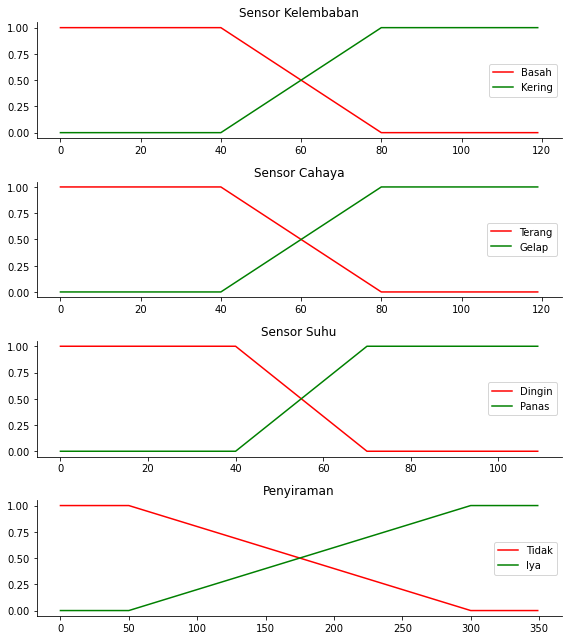

In [4]:
# Membuat Grafik Himpunan Fuzzy
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8,9))

ax0.plot(Kelembaban, Kelembaban_Basah, 'r', linewidth=1.5, label='Basah')
ax0.plot(Kelembaban, Kelembaban_Kering, 'g', linewidth=1.5, label='Kering')

ax0.set_title('Sensor Kelembaban')
ax0.legend()

ax1.plot(Cahaya, Cahaya_Terang, 'r', linewidth=1.5, label='Terang')
ax1.plot(Cahaya,Cahaya_Gelap, 'g', linewidth=1.5, label='Gelap')

ax1.set_title('Sensor Cahaya')
ax1.legend()

ax2.plot(Suhu_Dingin, 'r', linewidth=1.5, label='Dingin')
ax2.plot(Suhu_Panas, 'g', linewidth=1.5, label='Panas')

ax2.set_title('Sensor Suhu')
ax2.legend()

ax3.plot(Penyiraman,Penyiraman_Tidak, 'r', linewidth=1.5, label='Tidak')
ax3.plot(Penyiraman,Penyiraman_Iya , 'g', linewidth=1.5, label='Iya')

ax3.set_title('Penyiraman')
ax3.legend()

for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()

In [5]:
# Mengimput Nilai Kasus
SK = 55
SC = 50
SS = 29

In [6]:
# Menentukan Rule Base
"""
•R1, Jika kelembaban tanah basah, cahaya terang DAN suhu panas  maka kecepatan penyiraman tanaman = 0 
•R2, Jika kelembaban tanah basah, cahaya terang DAN suhu dingin maka kecepatan penyiraman tanaman = 10*cahaya+100
•R3, Jika kelembaban tanah basah, cahaya gelap DAN  suhu panas maka kecepatan penyiraman tanaman = 10*cahaya+200
•R4, Jika kelembaban tanah basah, cahaya gelap DAN  suhu dingin maka kecepatan penyiraman tanaman = 10*cahaya+300
•R5, JJika kelembaban tanah kering, cahaya terang DAN suhu panas maka kecepatan penyiraman tanaman = 5*cahaya+2*suhu
•R6, JJika kelembaban tanah kering, cahaya terang DAN suhu dingin maka kecepatan penyiraman tanaman = 5*cahaya+4*suhu+100
•R7, JJika kelembaban tanah kering, cahaya gelap DAN  suhu panas maka alat akan menyiram dan pot terbuka=5*cahaya+5*suhu+200
•R8, JJika kelembaban tanah kering, cahaya gelap DAN  suhu panasmaka alat akan menyiram dan pot terbuka=5*cahaya+6*suhu+300

Domain penyiraman:
Tidak --> (80-Z)/(80-20) = fmin; apred[i] = fmin; (80 - Z) = 60 * apred[i]; Z = 80 - (60 * apred[i])
Iya --> (Z-20)/(80-20) = fmin; apred[i] = fmin; (Z - 20) = 60 * apred[i]; Z = (60 * apred[i]) + 20
""";


In [7]:
# Menentukan Derajat Keanggotaan
a = []
a.append(fuzz.interp_membership(Kelembaban, Kelembaban_Basah, SK))
a.append(fuzz.interp_membership(Kelembaban, Kelembaban_Kering, SK))

b = []
b.append(fuzz.interp_membership(Cahaya, Cahaya_Terang, SC))
b.append(fuzz.interp_membership(Cahaya,Cahaya_Gelap, SC))

c = []
c.append(fuzz.interp_membership(Suhu, Suhu_Dingin, SS))
c.append(fuzz.interp_membership(Suhu, Suhu_Panas, SS))

print("Derajat Keanggotaan Sensor Kelembaban")
if a[0] > 0:
    print("Basah: "+str(a[0]))
if a[1] > 0:
    print("Kering: "+str(a[1]))

print("Derajat Keanggotaan Sensor Cahaya")
if b[0] > 0:
    print("Terang: "+str(b[0]))
if b[1] > 0:
    print("Gelap: "+str(b[1]))

print("Derajat Keanggotaan Sensor Suhu")
if c[0] > 0:
    print("Dingin: "+str(c[0]))
if c[1] > 0:
    print("Panas: "+str(c[1]))

Derajat Keanggotaan Sensor Kelembaban
Basah: 0.625
Kering: 0.375
Derajat Keanggotaan Sensor Cahaya
Terang: 0.75
Gelap: 0.25
Derajat Keanggotaan Sensor Suhu
Dingin: 1.0


In [17]:


# Memodelkan Rule Base dan Inferensi Mamdani

x1 = np.fmin(a[0], b[0])
apred1 = np.fmin(x1, c[0])
print("Rendah, Nilai apred1 = ", apred1)
z1 = 0
print("Nilai z1 = ", z1)

x2 = np.fmin(a[0], b[0])
apred2 = np.fmin(x2, c[1])
print("Rendah, Nilai apred2 = ", apred2)
z2 = 10*50+100
print("Nilai z2 = ", z2)

x3 = np.fmin(a[0], b[1])
apred3 = np.fmin(x3, c[0])
print("Rendah, Nilai apred3 = ", apred3)
z3 = 10*50+200
print("Nilai z3 = ", z3)

x4 = np.fmin(a[0], b[1])
apred4 = np.fmin(x4, c[1])
print("Tinggi, Nilai apred4 = ", apred4)
z4 = 10*50+300
print("Nilai z4 = ", z4)

x5 = np.fmin(a[1], b[0])
apred5 = np.fmin(x5, c[0])
print("Rendah, Nilai apred5 = ", apred5)
z5 =  5*50+2*29
print("Nilai z5 = ", z5)

x6 = np.fmin(a[1], b[0])
apred6 = np.fmin(x6, c[1])
print("Tinggi, Nilai apred6 = ", apred6)
z6 = 5*50+4*2+100
print("Nilai z6 = ", z6)

x7 = np.fmin(a[1], b[1])
apred7 = np.fmin(x7, c[0])
print("Tinggi, Nilai apred7 = ", apred7)
z7 = 5*50+5*29+200
print("Nilai z7 = ", z7)

x8 = np.fmin(a[1], b[1])
apred8 = np.fmin(x8, c[1])
print("Tinggi, Nilai apred8 = ", apred8)
z8 = 5*50+6*29+300
print("Nilai z8 = ", z8)

Nilai_rendah=np.fmax(np.fmax(apred1, apred2), np.fmax(apred3, apred5))
Nilai_tinggi=np.fmax(np.fmax(apred4, apred6), np.fmax(apred7, apred8))
print('Penyiraman Tanaman')
print('Tidak = ', Nilai_rendah)
print('Iya = ', Nilai_tinggi)


Rendah, Nilai apred1 =  0.625
Nilai z1 =  0
Rendah, Nilai apred2 =  0.0
Nilai z2 =  600
Rendah, Nilai apred3 =  0.25
Nilai z3 =  700
Tinggi, Nilai apred4 =  0.0
Nilai z4 =  800
Rendah, Nilai apred5 =  0.375
Nilai z5 =  308
Tinggi, Nilai apred6 =  0.0
Nilai z6 =  358
Tinggi, Nilai apred7 =  0.25
Nilai z7 =  595
Tinggi, Nilai apred8 =  0.0
Nilai z8 =  724
Penyiraman Tanaman
Tidak =  0.625
Iya =  0.25


In [18]:
# Defuzzyfikasi
(apred1*z1)+(apred2*z2)+(apred3*z3)+(apred4*z4)+(apred5*z5)+(apred6*z5)+(apred6*z6)*(apred7*z7)*(apred8*z8)/(apred1+apred2+apred3+apred4+apred5+apred6+apred7+apred8)

290.5